
#Author :Jayaprakash Natarajan

In this Classification task, used different ML models to predict whether the passenger survived in Titanic Sinking.

## Description

The application can predict whether the passenger survived in Titanic sinking based on. The Model will analyse the parameters and predict whether the passenger survived or not. 

#Datasets: 
- Input: The dataset has multiple features as input(PassengerClass, Sex, Age, Fare)
- Output: Survived/Not

#Technical Stack : 
- Sikit Learn, Numpy Array, Pandas, Matplotlib, pylab etc,.

#Performance 
Below metrics are used to calculate the performance of the model:
- Accuracy score
- ROC AUC score, ROC Curve
- Confusion Matrix

#Load and Summarize Dataset

In [221]:
#Import the Titanic dataset
import pandas as pd
import seaborn as sns
df = sns.load_dataset("titanic")
df = df.loc[:, ["sex", "pclass", "age", "fare", "alive"]]
df.head()

,sex,pclass,age,fare,alive
0,male,3,22.0,7.2500,no
1,female,1,38.0,71.2833,yes
2,female,3,26.0,7.9250,yes
3,female,1,35.0,53.1000,yes
4,male,3,35.0,8.0500,no


In [222]:
df.shape

(891, 5)

In [223]:
df.dtypes

sex        object
pclass      int64
age       float64
fare      float64
alive      object
dtype: object

#Data Cleaning
Since there are few text fields in my dataset, performing Data cleaning by using any of below methods
- LabelEncoder(Inbuilt function)
- Using Map function( **df.Sex = df.Sex.map({"male": 0, "female": 1})**)

In [224]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList = df.select_dtypes(include = "object").columns

for col in objList:
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

,sex,pclass,age,fare,alive
0,1,3,22.0,7.2500,0
1,0,1,38.0,71.2833,1
2,0,3,26.0,7.9250,1
3,0,1,35.0,53.1000,1
4,1,3,35.0,8.0500,0


#Check for NAN values
check whether there are any NAN/Missig values in my dataset and handle them accordingly.
There are NAN values in "age".

In [225]:
df.isna().any()

sex       False
pclass    False
age        True
fare      False
alive     False
dtype: bool

In [226]:
df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

From the above observation there are chance of outliers, since max value is (3SD) away fromm mean. Hence using meadian to fill the NAN values in my dataset, as median is not affected much by outliers.

In [227]:
df["age"].fillna(df.age.median(), inplace=True)

#Gaussian Transformation
Many ML algorithms like linear & logistic assumes that that features are Gaussian distributed. Hence checking whether our data is Gaussian Distributed and convert them to Gaussian Distribution using various Transformation methods. 

**Transformation is performed to increase the accuracy of the model**

Below are few methods used:
- Logrithmic
- Reciprocal
- SquareRoot
- Exponential

In [228]:
#Function to transform our feature
import numpy as np
def transform(dataframe, feature):
  global df_result
  df_result[feature] = dataframe[feature]
  names = ["Logarithmic", "Reciprocal", "SquareRoot", "Exponential"]
  transformations = [np.log(dataframe[feature]), 1/dataframe[feature], dataframe[feature]**(1/2), dataframe[feature]**(1/1.2)]
  for name, result in zip(names, transformations):
    df_result[name] = result

In [229]:
df_result = pd.DataFrame()
transform(df, "age")
df_result

,age,Logarithmic,Reciprocal,SquareRoot,Exponential
0,22.0,3.091042,0.045455,4.690416,13.142729
1,38.0,3.637586,0.026316,6.164414,20.724608
2,26.0,3.258097,0.038462,5.099020,15.105825
3,35.0,3.555348,0.028571,5.916080,19.351889
4,35.0,3.555348,0.028571,5.916080,19.351889
...,...,...,...,...,...
886,27.0,3.295837,0.037037,5.196152,15.588457
887,19.0,2.944439,0.052632,4.358899,11.631293
888,28.0,3.332205,0.035714,5.291503,16.068119
889,26.0,3.258097,0.038462,5.099020,15.105825


Once we transform our feature into different distributions, we can check Q-Q plot to find the best fit distribution of data

In [230]:
#Draw the histogram and Q-Q plot for the distribution
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt

def probplot(dataframe, feature):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  dataframe[feature].hist()
  plt.subplot(1,2,2)
  stats.probplot(dataframe[feature], dist="norm", plot=pylab)
  plt.show()

age


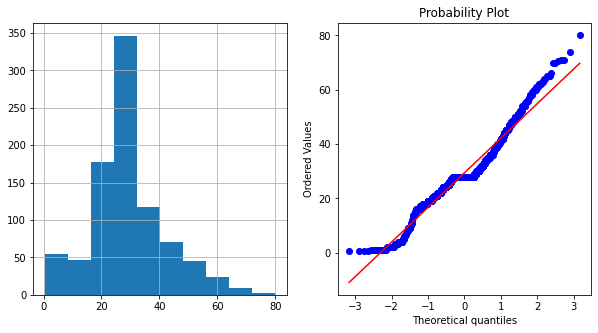

Logarithmic


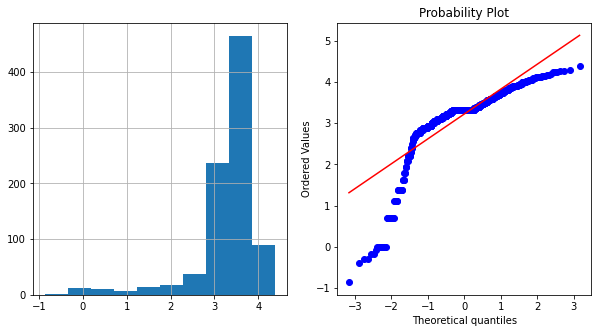

Reciprocal


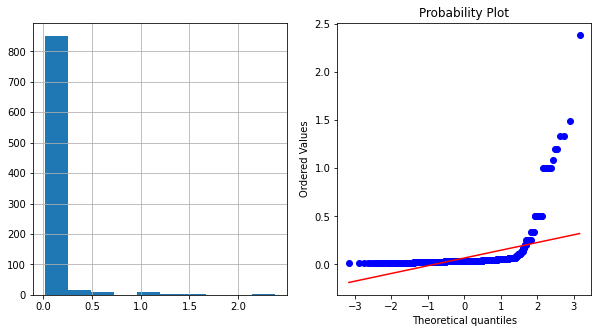

SquareRoot


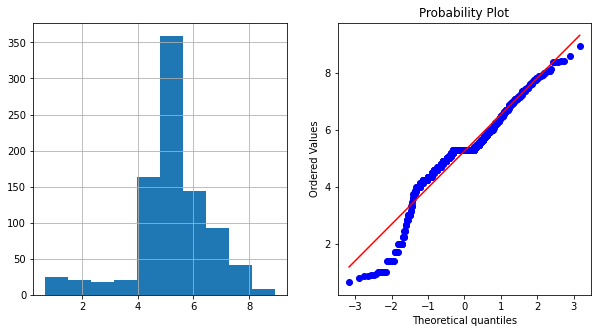

Exponential


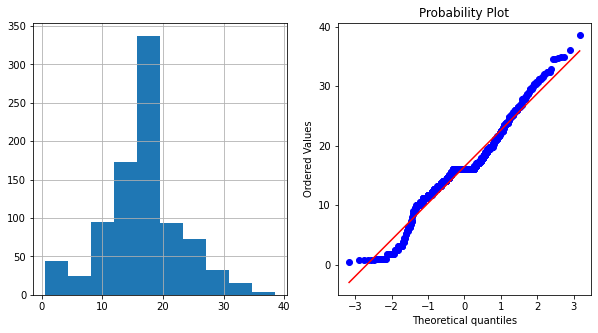

In [231]:
for data in df_result.columns.values:
  print(data)
  probplot(df_result, data)

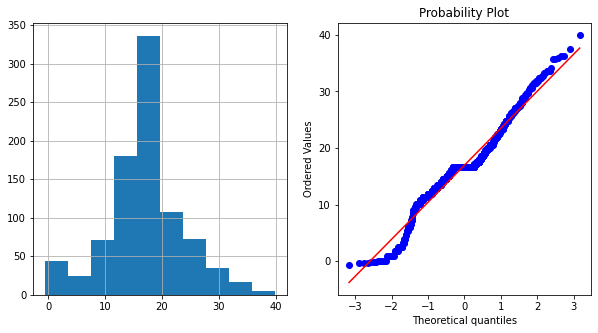

In [232]:
df["age_boxcox"], parms = stats.boxcox(df["age"])
plot_graph(df, "age_boxcox")

In [233]:
df.describe()

,sex,pclass,age,fare,alive,age_boxcox
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,2.308642,29.361582,32.204208,0.383838,16.939632
std,0.477990,0.836071,13.019697,49.693429,0.486592,6.666751
min,0.000000,1.000000,0.420000,0.000000,0.000000,-0.626386
25%,0.000000,2.000000,22.000000,7.910400,0.000000,13.468119
50%,1.000000,3.000000,28.000000,14.454200,0.000000,16.586014
75%,1.000000,3.000000,35.000000,31.000000,1.000000,20.056110
max,1.000000,3.000000,80.000000,512.329200,1.000000,39.912624


#We can tranform age --> Gaussian Distribution using BoxCox

In [234]:
df_result = pd.DataFrame()
transform(df, "fare")
df_result

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,fare,Logarithmic,Reciprocal,SquareRoot,Exponential
0,7.2500,1.981001,0.137931,2.692582,5.211327
1,71.2833,4.266662,0.014029,8.442944,35.007129
2,7.9250,2.070022,0.126183,2.815138,5.612625
3,53.1000,3.972177,0.018832,7.286975,27.389163
4,8.0500,2.085672,0.124224,2.837252,5.686302
...,...,...,...,...,...
886,13.0000,2.564949,0.076923,3.605551,8.477858
887,30.0000,3.401197,0.033333,5.477226,17.019013
888,23.4500,3.154870,0.042644,4.842520,13.860717
889,30.0000,3.401197,0.033333,5.477226,17.019013


fare


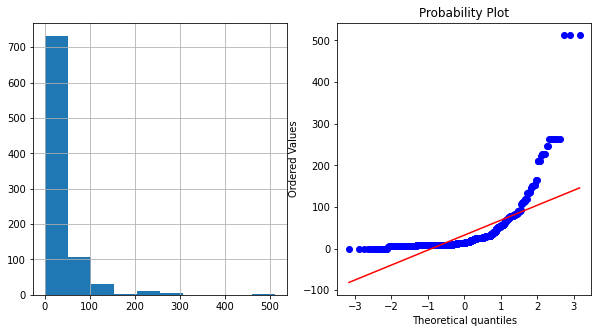

SquareRoot


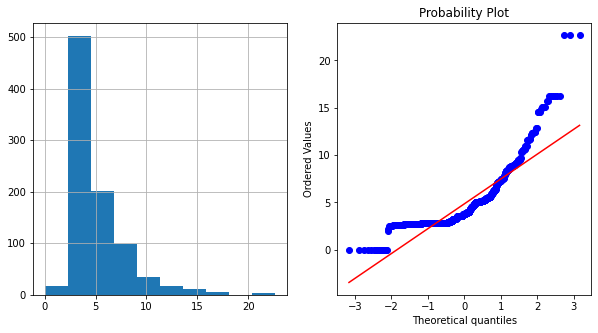

Exponential


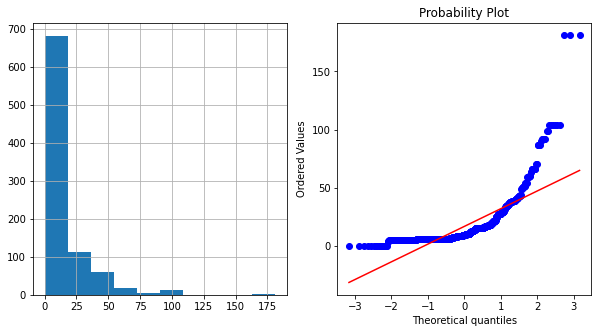

In [235]:
for data in ["fare", "SquareRoot", "Exponential"]:
  print(data)
  probplot(df_result, data)

#From above observation, I see the data is near Gaussian Distribution on performign Squareroot transformation
So finalylysing below tranformation:
- age --> Boxcox
- fare --> Squareroot

In [236]:
#From above observation, applying squareroot for the features
df["fare_squareroot"] = df["fare"]**(1/2)

In [239]:
df.describe()

,sex,pclass,age,fare,alive,age_boxcox,fare_squareroot
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,2.308642,29.361582,32.204208,0.383838,16.939632,4.851220
std,0.477990,0.836071,13.019697,49.693429,0.486592,6.666751,2.946119
min,0.000000,1.000000,0.420000,0.000000,0.000000,-0.626386,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000,13.468119,2.812542
50%,1.000000,3.000000,28.000000,14.454200,0.000000,16.586014,3.801868
75%,1.000000,3.000000,35.000000,31.000000,1.000000,20.056110,5.567764
max,1.000000,3.000000,80.000000,512.329200,1.000000,39.912624,22.634690


#From above observation perform transformation for below features:
- age --> BoxCox
- fare --> Squareroot

In [240]:
df["age"] = df["age_boxcox"]
df["fare"] = df["fare_squareroot"]
df.describe()

,sex,pclass,age,fare,alive,age_boxcox,fare_squareroot
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,2.308642,16.939632,4.851220,0.383838,16.939632,4.851220
std,0.477990,0.836071,6.666751,2.946119,0.486592,6.666751,2.946119
min,0.000000,1.000000,-0.626386,0.000000,0.000000,-0.626386,0.000000
25%,0.000000,2.000000,13.468119,2.812542,0.000000,13.468119,2.812542
50%,1.000000,3.000000,16.586014,3.801868,0.000000,16.586014,3.801868
75%,1.000000,3.000000,20.056110,5.567764,1.000000,20.056110,5.567764
max,1.000000,3.000000,39.912624,22.634690,1.000000,39.912624,22.634690


In [241]:
df.drop(["age_boxcox", "fare_squareroot"], axis=1, inplace=True)

#Convert the dataset into Input & Output

In [243]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

#Split the datasets into Train and test for training our model.

In [244]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

#Feature Scaling

In [245]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
tr_x_train = ss.transform(x_train)
tr_x_test = ss.transform(x_test)

In [246]:
pd.DataFrame(tr_x_train, columns=X.columns).describe()

,sex,pclass,age,fare
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,7.983626e-17,-2.332716e-16,-2.395088e-16,2.644576e-16
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.402379e+00,-1.534951e+00,-2.637474e+00,-1.638467e+00
25%,-1.402379e+00,-1.534951e+00,-4.707313e-01,-6.853470e-01
50%,7.130740e-01,8.383066e-01,-8.741952e-02,-3.513124e-01
75%,7.130740e-01,8.383066e-01,4.983247e-01,2.584490e-01
max,7.130740e-01,8.383066e-01,3.001273e+00,6.039106e+00


# Training model
Once we are done with all the preprocessing steps, we can proceed to training our model. Have selected below Classification algorithms:
- RandomForestClassifier
- LogisticRegression
- AdaBoostClassifier
- KNeighborsClassifier
-  GaussianNB

In [247]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
ada_model = AdaBoostClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
models_accuracy = []

models = [rf_model, lr_model, ada_model, knn_model, nb_model]
models_name = [str(i) for i in models]

pred = []
for model in models:
  model.fit(tr_x_train, y_train)
  y_train_pred = model.predict_proba(tr_x_train)
  train_accuracy = roc_auc_score(y_train, y_train_pred[:,-1]) * 100
  y_test_pred = model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy of Model: {} for train: {} %, test: {} %".format(str(model), train_accuracy, test_accuracy))
  models_accuracy.append(test_accuracy)
  pred.append(pd.Series(y_test_pred[:,-1]))

df_models_output = pd.concat(pred, axis=1)
df_models_output.columns = models_name
#Create a dataframe of all the model accuracy for a paricular sample
df_models_output["final_prediction"] = df_models_output.mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, df_models_output["final_prediction"])))

Accuracy of Model: RandomForestClassifier() for train: 99.70922459893048 %, test: 83.1127129750983 %
Accuracy of Model: LogisticRegression() for train: 85.2840909090909 %, test: 83.07339449541283 %
Accuracy of Model: AdaBoostClassifier() for train: 89.92897727272728 %, test: 79.03669724770643 %
Accuracy of Model: KNeighborsClassifier() for train: 94.01737967914438 %, test: 83.06684141546528 %
Accuracy of Model: GaussianNB() for train: 82.93282085561499 %, test: 79.01048492791611 %
Ensemble test roc-auc: 0.8482961992136304


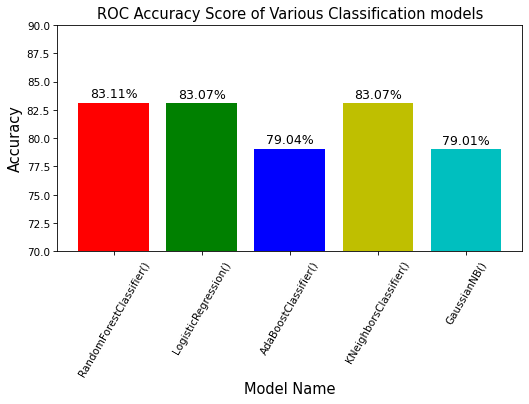

In [249]:
plt.figure(figsize=(8,4), dpi=75)
plt.bar(models_name, models_accuracy, color=list("rgbyc"))
plt.xlabel("Model Name", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("ROC Accuracy Score of Various Classification models", fontsize=14)
for index, data in enumerate(models_accuracy):
  plt.text(x=index, y=data+0.5, s=f"{data.round(2)}%", ha="center", fontsize=12)
plt.ylim(70,90)
plt.xticks(rotation=60)
plt.show()

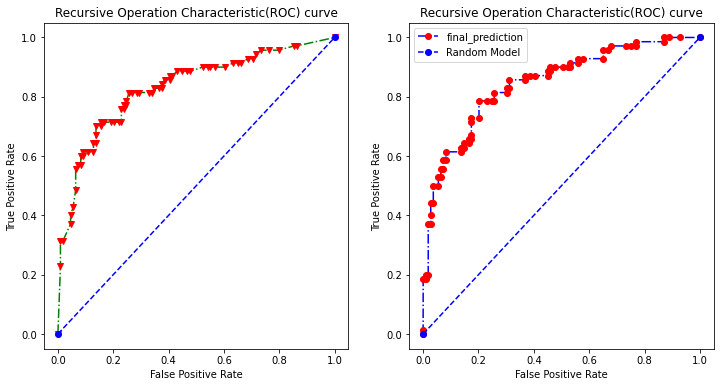

In [253]:
fpr, tpr, threshold = roc_curve(y_test, df_models_output["RandomForestClassifier()"])
fpr_fi, tpr_fi, threshold1 = roc_curve(y_test, df_models_output["final_prediction"])
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, "g-.v", mfc="r", mec="r", label="Random Forest Classifier")
plt.plot([0,1], [0,1], "b--o", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recursive Operation Characteristic(ROC) curve")
plt.subplot(1,2,2)
plt.plot(fpr_fi, tpr_fi, "b-.o", mfc="r", mec="r", label="final_prediction")
plt.plot([0,1], [0,1], "b--o", label="Random Model")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recursive Operation Characteristic(ROC) curve")
plt.show()

In [254]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in threshold:
  y_pred = np.where(df_models_output["RandomForestClassifier()"].values > thres, 1, 0)
  accuracy_value = accuracy_score(y_pred, y_test)
  accuracy_ls.append(accuracy_value)

threshold_accuracy = pd.concat([pd.Series(threshold), pd.Series(accuracy_ls)], axis=1)
threshold_accuracy.columns = ["Threshold", "Accuracy"]
threshold_accuracy.sort_values(by="Accuracy", ascending=False, inplace=True)
threshold_accuracy.head()

,Threshold,Accuracy
20,0.57000,0.798883
22,0.52000,0.793296
19,0.58000,0.793296
12,0.83987,0.793296
14,0.82000,0.793296


##Show the ROC output to Domain expert and fix the threshold based on his suggestion

In [255]:
models = [rf_model, lr_model, ada_model, knn_model, nb_model]
models_name = [str(i) for i in models]

models_accuracy = []
for model in models:
  model.fit(tr_x_train, y_train)
  y_pred = model.predict(tr_x_test)
  test_accuracy = accuracy_score(y_test, y_pred) * 100
  print("Accuracy of Model: {} is {} %".format(str(model), test_accuracy))
  models_accuracy.append(test_accuracy)

Accuracy of Model: RandomForestClassifier() is 79.88826815642457 %
Accuracy of Model: LogisticRegression() is 75.97765363128491 %
Accuracy of Model: AdaBoostClassifier() is 75.97765363128491 %
Accuracy of Model: KNeighborsClassifier() is 80.44692737430168 %
Accuracy of Model: GaussianNB() is 73.74301675977654 %


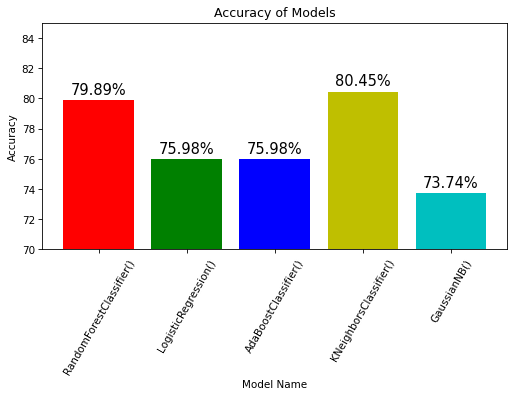

In [256]:
plt.figure(figsize=(8,4), dpi=75)
plt.bar(models_name, models_accuracy, color=list("rgbyc"))
plt.ylim(70,85)
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
for index, data in enumerate(models_accuracy):
  plt.text(x=index, y=data+0.4, s=f"{data.round(2)}%", ha="center", fontsize=14)
plt.xticks(rotation=60)
plt.show()

#Since Accuracy for the dataset is more for RandormForestClassifier, we can use RF model

In [198]:
#Extract the model to a Pickle file
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [217]:
rf = RandomForestClassifier().fit(tr_x_train, y_train)
value = ss.transform([[3,1,22,7.25]])
rf.predict(value)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


1